# TASK 2

**NAME : SEAN RICHARD JOGI**

The Sparks Foundation - Graduate Rotational Internship Program

Domain : Data Science & Business Analytics

**PROBLEM STATEMENT 3: SALARY PREDICTION USING LINEAR REGRESSION**

In [ ]:
import os
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from io import StringIO

%matplotlib inline
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import random
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_excel("/Data_file.xlsx",skiprows=[0,1],index_col=0)


In [ ]:
data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,,,,
1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1338
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 94.1+ KB


In [ ]:
data.shape

(1338, 8)

In [ ]:
data.isna().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

In [ ]:
cat_columns = data.select_dtypes(['object']).columns

In [ ]:
data

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,,,,
1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...
1334,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1335,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1336,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686


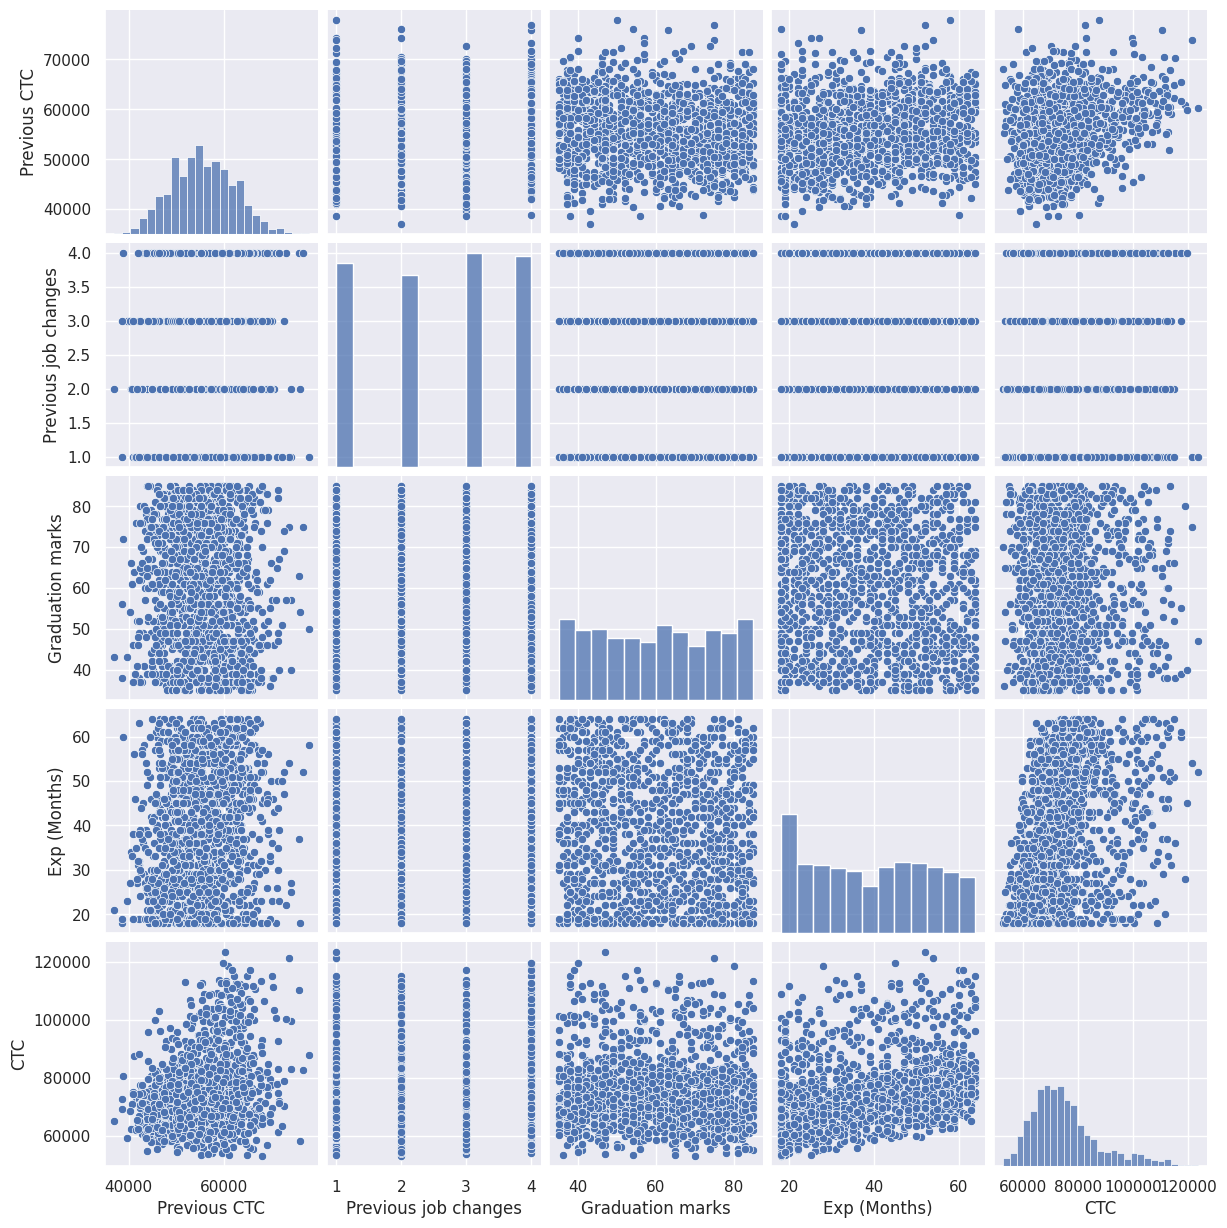

In [ ]:
sns.pairplot(data)

(<BarContainer object of 1338 artists>, <BarContainer object of 1338 artists>)

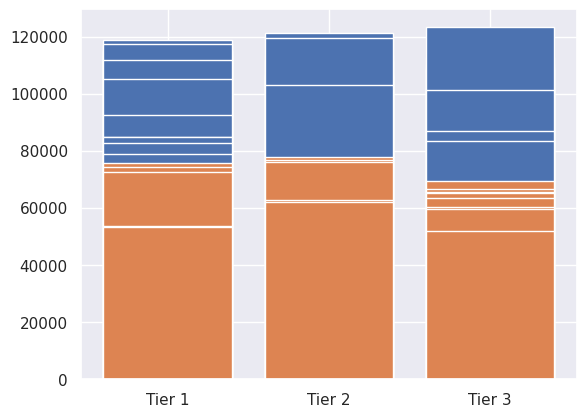

In [ ]:
plt.bar('College' , 'CTC' , data = data), plt.bar('College','Previous CTC', data = data)

(<BarContainer object of 1338 artists>, <BarContainer object of 1338 artists>)

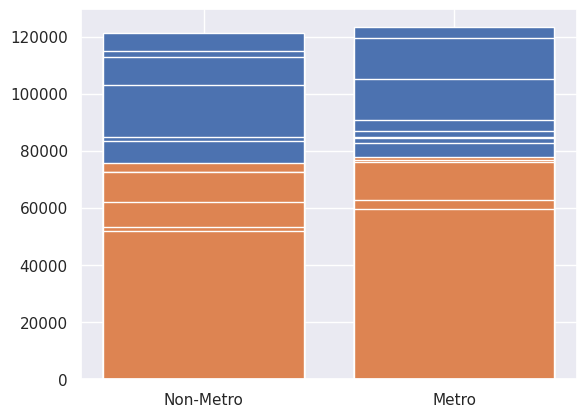

In [ ]:
plt.bar('City type','CTC', data = data), plt.bar('City type','Previous CTC', data = data)

(<BarContainer object of 1338 artists>, <BarContainer object of 1338 artists>)

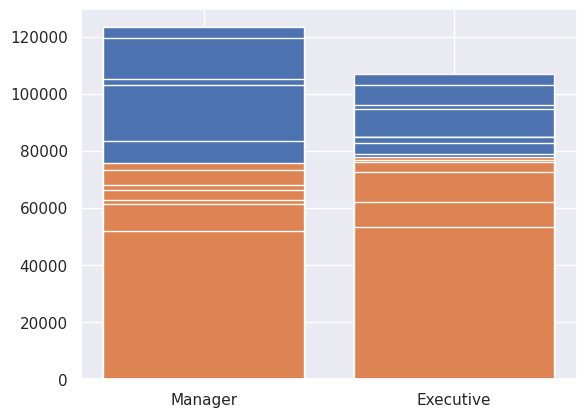

In [ ]:
plt.bar('Role','CTC',data = data), plt.bar('Role','Previous CTC', data = data) 

<Axes: xlabel='Previous job changes', ylabel='CTC'>

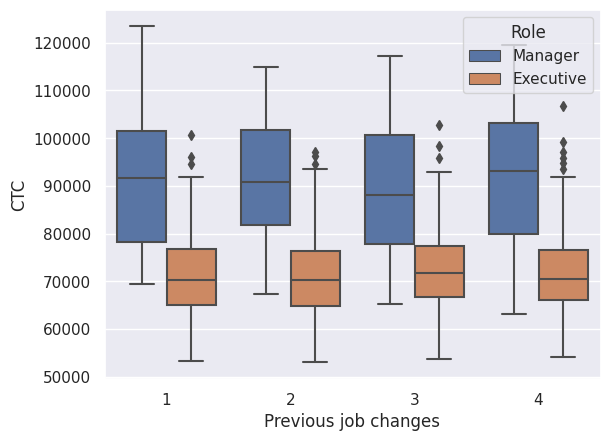

In [ ]:
sns.boxplot(x='Previous job changes', y='CTC',hue='Role', data=data)

In [ ]:
cm = data.corr()

<ipython-input-115-251cf5733e53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = data.corr()


In [ ]:
cm

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
Previous CTC,1.000000,0.008282,-0.037170,0.117035,0.270260
Previous job changes,0.008282,1.000000,0.001507,0.034137,0.007518
Graduation marks,-0.037170,0.001507,1.000000,-0.065412,-0.017557
Exp (Months),0.117035,0.034137,-0.065412,1.000000,0.301569
CTC,0.270260,0.007518,-0.017557,0.301569,1.000000


<Axes: >

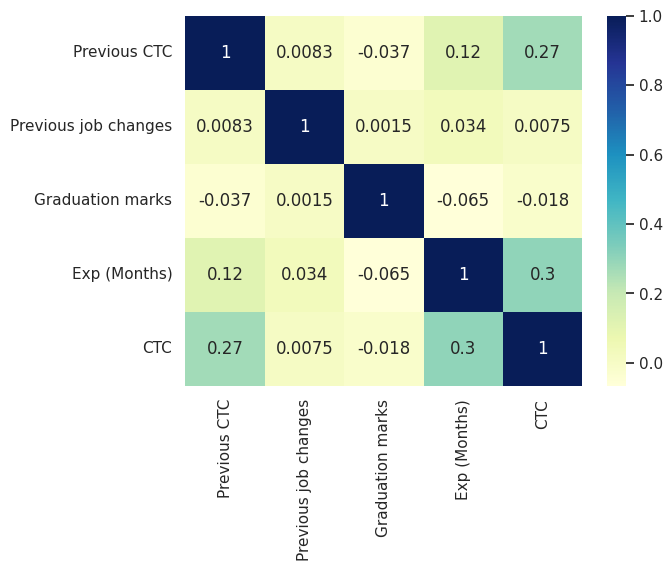

In [ ]:
sns.heatmap(cm, annot=True, cmap='YlGnBu' )

In [ ]:
x=data.drop(["CTC"],axis=1)

In [ ]:
y=data['CTC']

In [ ]:
x

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months)
S.No.,,,,,,,
1,Tier 1,Manager,Non-Metro,55523,3,66,19
2,Tier 2,Executive,Metro,57081,1,84,18
3,Tier 2,Executive,Metro,60347,2,52,28
4,Tier 3,Executive,Metro,49010,2,81,33
5,Tier 3,Executive,Metro,57879,4,74,32
...,...,...,...,...,...,...,...
1334,Tier 3,Executive,Metro,59661,4,68,50
1335,Tier 1,Executive,Non-Metro,53714,1,67,18
1336,Tier 2,Executive,Non-Metro,61957,1,47,18


In [ ]:
trans_x = pd.get_dummies(x ,drop_first=True)
trans_x.head()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),College_Tier 2,College_Tier 3,Role_Manager,City type_Non-Metro
S.No.,,,,,,,,
1,55523,3,66,19,0,0,1,1
2,57081,1,84,18,1,0,0,0
3,60347,2,52,28,1,0,0,0
4,49010,2,81,33,0,1,0,0
5,57879,4,74,32,0,1,0,0


In [ ]:
sc = StandardScaler()
trans_x=sc.fit_transform(trans_x)

In [ ]:
pd.DataFrame(trans_x)

,0,1,2,3,4,5,6,7
0,-0.008793,0.422577,0.410307,-1.438764,-0.611324,-0.566418,1.970587,1.010519
1,0.224333,-1.358237,1.619243,-1.509965,1.635795,-0.566418,-0.507463,-0.989591
2,0.713028,-0.467830,-0.529976,-0.797954,1.635795,-0.566418,-0.507463,-0.989591
3,-0.983340,-0.467830,1.417754,-0.441948,-0.611324,1.765481,-0.507463,-0.989591
4,0.343738,1.312985,0.947612,-0.513149,-0.611324,1.765481,-0.507463,-0.989591
...,...,...,...,...,...,...,...,...
1333,0.610381,1.312985,0.544633,0.768473,-0.611324,1.765481,-0.507463,-0.989591
1334,-0.279475,-1.358237,0.477470,-1.509965,-0.611324,-0.566418,-0.507463,1.010519
1335,0.953934,-1.358237,-0.865792,-1.509965,1.635795,-0.566418,-0.507463,1.010519
1336,-0.355937,0.422577,0.611797,-1.296362,-0.611324,-0.566418,-0.507463,1.010519


In [ ]:
random.seed(42)
for i in range(0,101):
    print(i)
    for j in range(1,100):
        x_train, x_test, y_train, y_test = train_test_split(trans_x,y, test_size=j/100, random_state=i)
        x_train.shape, x_test.shape
        logreg = LinearRegression(n_jobs=i)
        logreg.fit(x_train, y_train)
        y_pred_test = logreg.predict(x_test)
        y_pred_test
        if (r2_score(y_test,y_pred_test)>0.8 and j>1):
            print('Model accuracy score:(0:0.4f) @random_state:(1) @testsplit(%): {2}'.format(r2_score(y_test, y_pred_test),i,j))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
Model accuracy score:(0:0.4f) @random_state:(1) @testsplit(%): 2
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(trans_x,y,test_size = .02, random_state = 50)

In [ ]:
import random
random.seed(42)
from sklearn.linear_model import LinearRegression
lr = LinearRegression(n_jobs=2)
lr.fit(X_train, Y_train)

LinearRegression(n_jobs=2)

In [ ]:
lr.intercept_

75468.6486526581

In [ ]:
lr.coef_

array([ 2984.49295358,   -70.10966725,   -18.19289083,  3654.22577171,
       -2408.25804437, -2003.38289156,  7767.08017745, -2038.58581722])

In [ ]:
salary_test = pd.read_excel('/Test_data_file.xlsx')

In [ ]:
salary_test.columns

Index(['College', 'Role', 'City type', 'College_T1', 'College_T2',
       'Role_Manager', 'City_Metro', 'previous CTC', 'previous job changes',
       'Graduation marks', 'Exp', 'Actual CTC', 'Predicted CTC', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [ ]:
salary_test.drop(['Unnamed: 13','College','Role','City type',
                  'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16','Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23'], inplace=True, axis=1)
     

In [ ]:
salary_test

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,1,0,1,0,55523,3,66,19,71406.576531,NaN
1,0,1,0,1,57081,1,84,18,68005.870631,NaN
2,0,1,0,1,60347,2,52,28,76764.020277,NaN
3,0,0,0,1,49010,2,81,33,82092.386880,NaN
4,0,0,0,1,57879,4,74,32,73878.097729,NaN
...,...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,59661,4,68,50,69712.403655,NaN
1334,1,0,0,0,53714,1,67,18,69298.750099,NaN
1335,0,1,0,0,61957,1,47,18,66397.770686,NaN
1336,1,0,0,0,53203,3,69,21,64044.382949,NaN


In [ ]:
x_test = salary_test.drop(['Actual CTC','Predicted CTC'], axis=1)
y_test = salary_test['Actual CTC']
x_test

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp
0,1,0,1,0,55523,3,66,19
1,0,1,0,1,57081,1,84,18
2,0,1,0,1,60347,2,52,28
3,0,0,0,1,49010,2,81,33
4,0,0,0,1,57879,4,74,32
...,...,...,...,...,...,...,...,...
1333,0,0,0,1,59661,4,68,50
1334,1,0,0,0,53714,1,67,18
1335,0,1,0,0,61957,1,47,18
1336,1,0,0,0,53203,3,69,21


In [ ]:
len(salary_test)

1338

In [ ]:
x_test = sc.fit_transform(x_test)
pd.DataFrame(x_test)

,0,1,2,3,4,5,6,7
0,1.030356,-0.611324,1.970587,-1.010519,-0.008793,0.422577,0.410307,-1.438764
1,-0.970538,1.635795,-0.507463,0.989591,0.224333,-1.358237,1.619243,-1.509965
2,-0.970538,1.635795,-0.507463,0.989591,0.713028,-0.467830,-0.529976,-0.797954
3,-0.970538,-0.611324,-0.507463,0.989591,-0.983340,-0.467830,1.417754,-0.441948
4,-0.970538,-0.611324,-0.507463,0.989591,0.343738,1.312985,0.947612,-0.513149
...,...,...,...,...,...,...,...,...
1333,-0.970538,-0.611324,-0.507463,0.989591,0.610381,1.312985,0.544633,0.768473
1334,1.030356,-0.611324,-0.507463,-1.010519,-0.279475,-1.358237,0.477470,-1.509965
1335,-0.970538,1.635795,-0.507463,-1.010519,0.953934,-1.358237,-0.865792,-1.509965
1336,1.030356,-0.611324,-0.507463,-1.010519,-0.355937,0.422577,0.611797,-1.296362


In [ ]:
y_prediction = lr.predict(x_test)
y_prediction

array([80152.60890171, 93918.62166493, 72813.23619748, ...,
       65551.23857267, 82308.38862547, 63075.1332238 ])

In [ ]:
print(f'r2_score of this model:{r2_score(y_test,y_prediction)}')
print(f'MAE of this model:{mean_absolute_error(y_test,y_prediction)}')
print(f'MSE of this model:{mean_squared_error(y_test,y_prediction)}')

r2_score of this model:-0.6852084456416327
MAE of this model:12846.282249614145
MSE of this model:265280284.88209185


In [ ]:
salary_test['Predicted CTC']=y_prediction
salary_test

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,1,0,1,0,55523,3,66,19,71406.576531,80152.608902
1,0,1,0,1,57081,1,84,18,68005.870631,93918.621665
2,0,1,0,1,60347,2,52,28,76764.020277,72813.236197
3,0,0,0,1,49010,2,81,33,82092.386880,91458.497957
4,0,0,0,1,57879,4,74,32,73878.097729,81188.419181
...,...,...,...,...,...,...,...,...,...,...
1333,0,0,0,1,59661,4,68,50,69712.403655,74803.612604
1334,1,0,0,0,53714,1,67,18,69298.750099,85084.029577
1335,0,1,0,0,61957,1,47,18,66397.770686,65551.238573
1336,1,0,0,0,53203,3,69,21,64044.382949,82308.388625


In [ ]:
salary_test.to_excel('/Salary_prediction.xlsx')

**MAIN CONCLUSIONS** : 




- **Average salary of candidate is 73112.**

- **Linear Regression Model gives an r2_score of 40.00%**

- **Managers or people with one job change get higher salary**

- **Metro city candidates get higher salary than non metro city candidates**

### **Thank you.**